In [59]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from utils import load_all_data

# Load Data

In [60]:
all_data = load_all_data()

all_data.head()

id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,train
i64,str,i64,f64,f64,f64,f64,f64,f64,bool
0,"""male""",36,189.0,82.0,26.0,101.0,41.0,150.0,true
1,"""female""",64,163.0,60.0,8.0,85.0,39.7,34.0,true
2,"""female""",51,161.0,64.0,7.0,84.0,39.8,29.0,true
3,"""male""",20,192.0,90.0,25.0,105.0,40.7,140.0,true
4,"""female""",38,166.0,61.0,25.0,102.0,40.6,146.0,true


# Basic Univariate Analyses of Training Data

In [61]:
train_data = all_data.filter(pl.col("train") == True)

In [62]:
train_data.describe()

statistic,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,train
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",750000.0,"""750000""",750000.0,750000.0,750000.0,750000.0,750000.0,750000.0,750000.0,750000.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",374999.5,null,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781,1.0
"""std""",216506.495284,null,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349,null
"""min""",0.0,"""female""",20.0,126.0,36.0,1.0,67.0,37.1,1.0,1.0
"""25%""",187500.0,null,28.0,164.0,63.0,8.0,88.0,39.6,34.0,null
"""50%""",375000.0,null,40.0,174.0,74.0,15.0,95.0,40.3,77.0,null
"""75%""",562499.0,null,52.0,185.0,87.0,23.0,103.0,40.7,136.0,null
"""max""",749999.0,"""male""",79.0,222.0,132.0,30.0,128.0,41.5,314.0,1.0


In [63]:
# proportions of men and women?
train_data['Sex'].value_counts(normalize=True)

Sex,proportion
str,f64
"""female""",0.500961
"""male""",0.499039


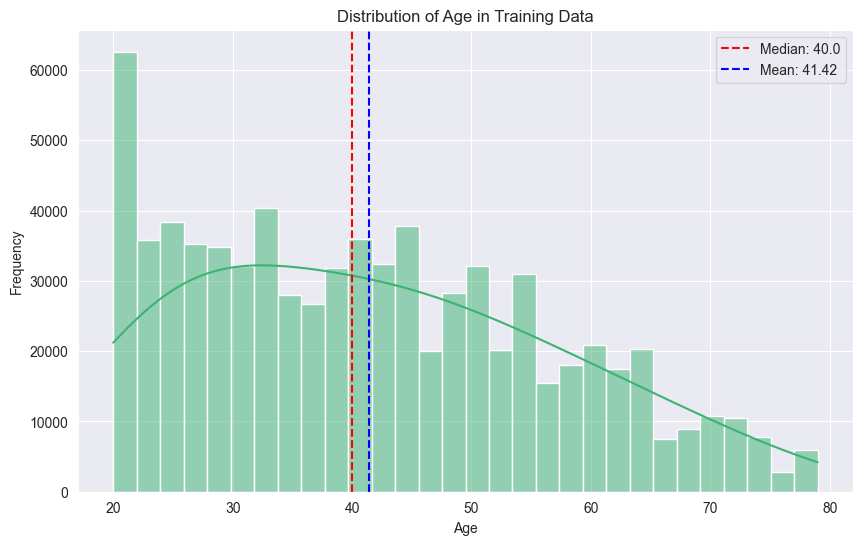

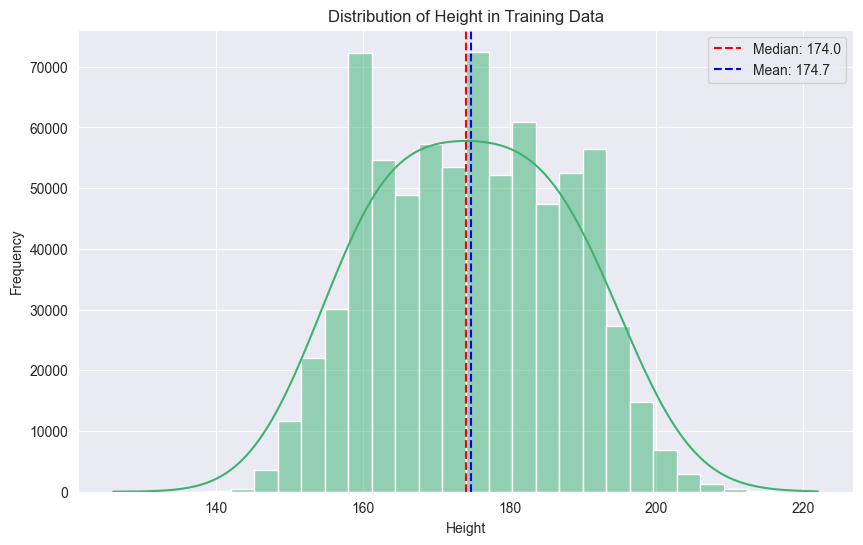

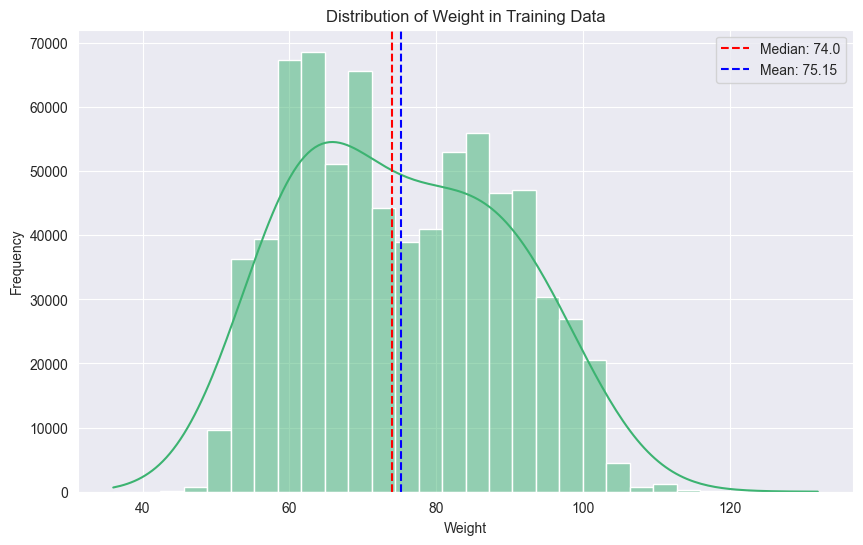

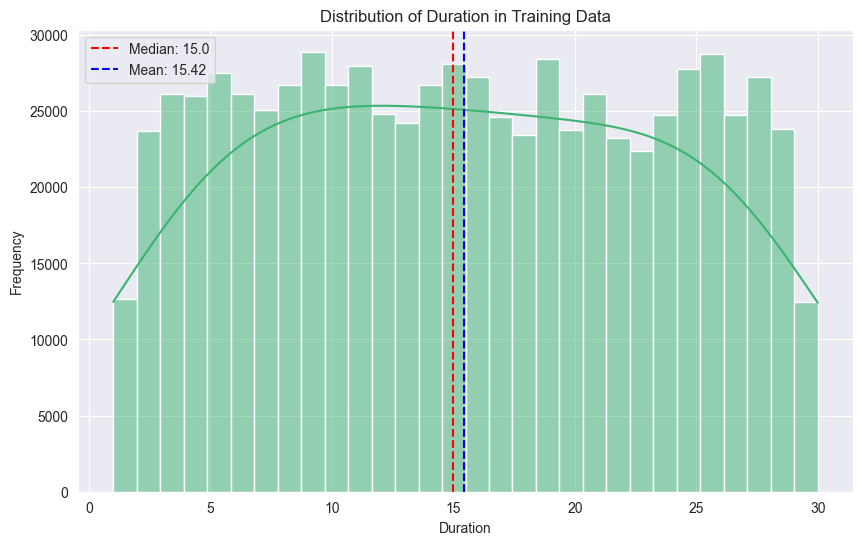

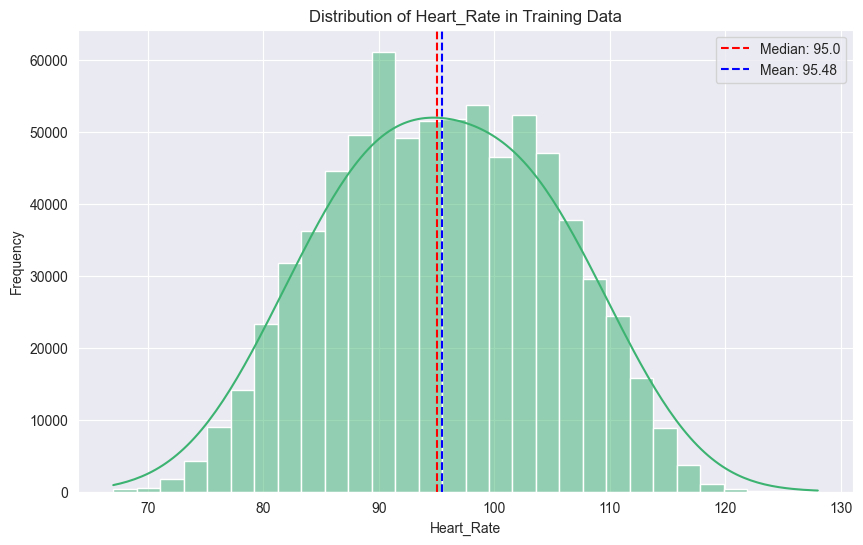

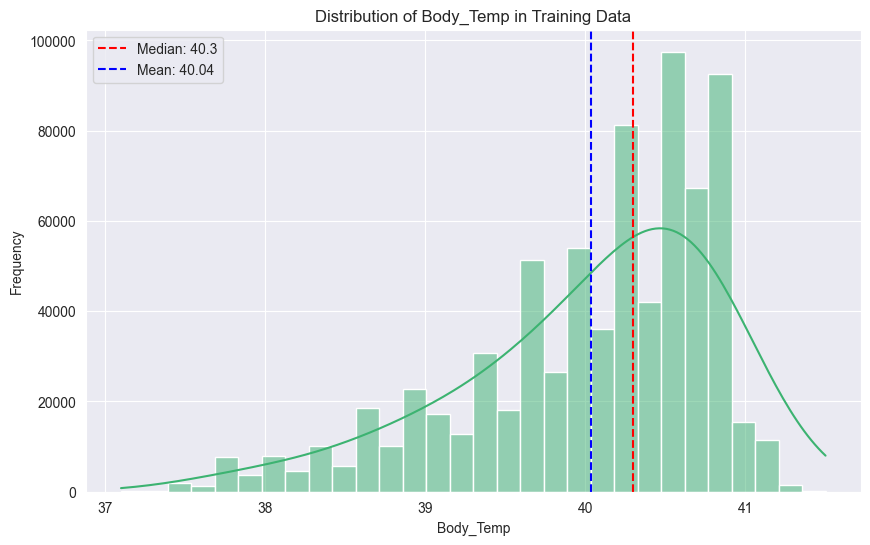

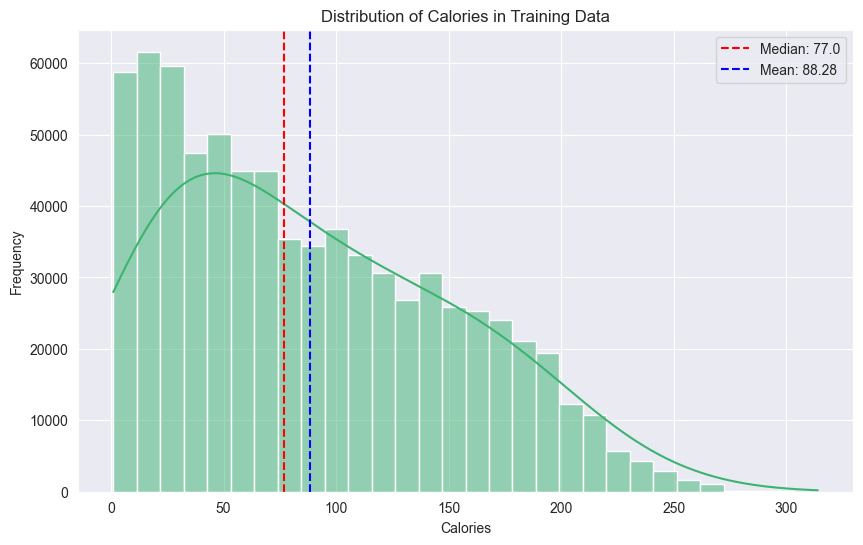

In [64]:
quantitative_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

for quantitative_feature in quantitative_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_data[quantitative_feature], bins=30, kde=True, color='mediumseagreen', kde_kws={'bw_method': 0.5})
    plt.title(f'Distribution of {quantitative_feature} in Training Data')
    plt.xlabel(quantitative_feature)
    plt.ylabel('Frequency')

    feature_median = train_data[quantitative_feature].median()
    feature_mean = train_data[quantitative_feature].mean()

    plt.axvline(feature_median, color='red', linestyle='--', label=f'Median: {round(feature_median, 2)}')
    plt.axvline(feature_mean, color='blue', linestyle='--', label=f'Mean: {round(feature_mean, 2)}')
    plt.legend()
    plt.show()

In [65]:
# proportions of train vs test data?
all_data['train'].value_counts(normalize=True)

train,proportion
bool,f64
false,0.25
true,0.75


**Observations and Insights**

- no apparent extreme values / outliers that could break models in any of the quantitative features
- left skew for body temperature, right skew for calories burned, slight right skew for age
- roughly equal number of men and women in the training set

# Bivariate Analyses of Training Data

Text(0.5, 1.0, 'Correlation Heatmap of Quantitative Features in Training Data')

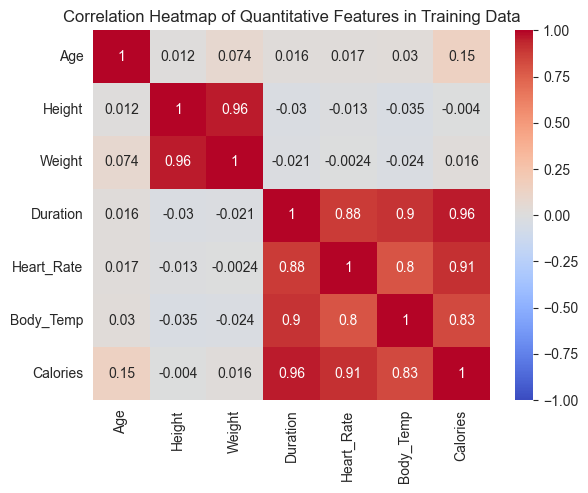

In [66]:
sns.heatmap(train_data[quantitative_features].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', xticklabels=quantitative_features, yticklabels=quantitative_features)
plt.title('Correlation Heatmap of Quantitative Features in Training Data')

Text(0.5, 1.02, 'Pairplot of Quantitative Features in Training Data')

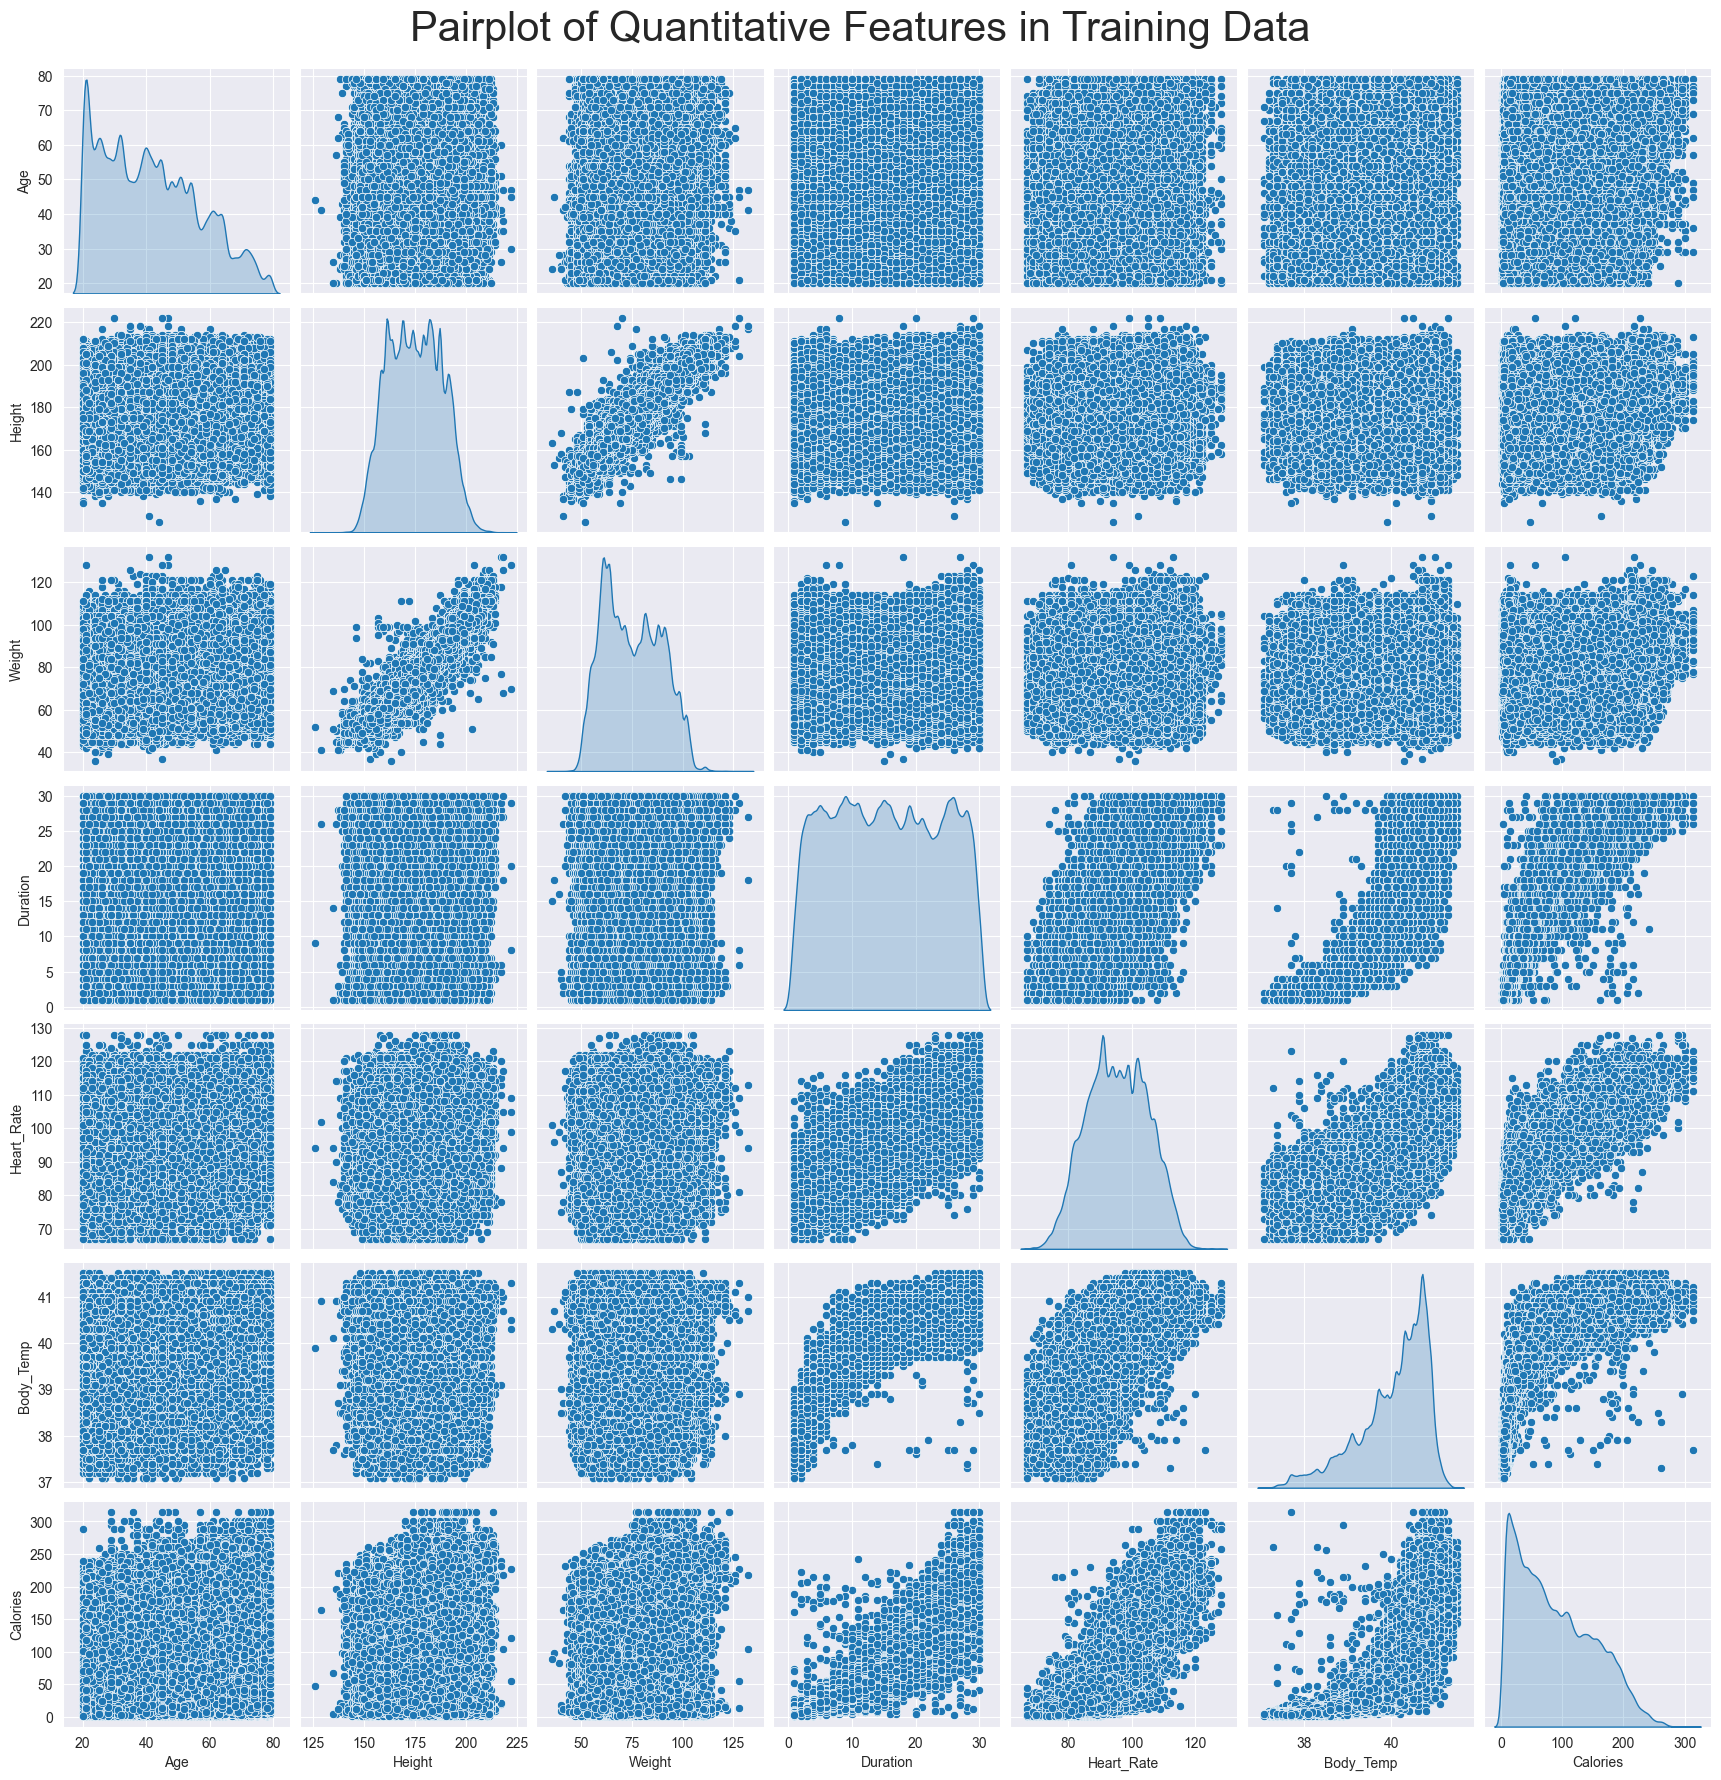

In [67]:
# this plot takes a minute
sns.pairplot(train_data[quantitative_features].to_pandas(), diag_kind='kde', markers='o')
plt.suptitle('Pairplot of Quantitative Features in Training Data', y=1.02, fontsize=30)

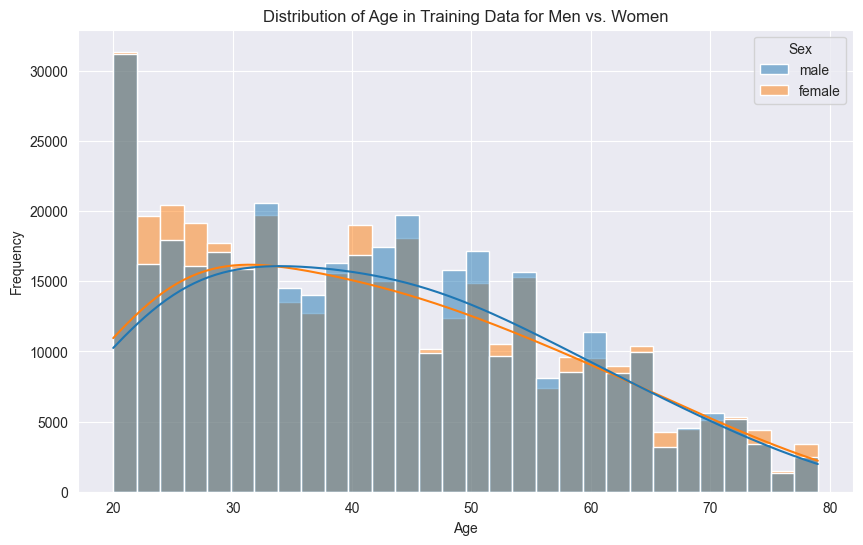

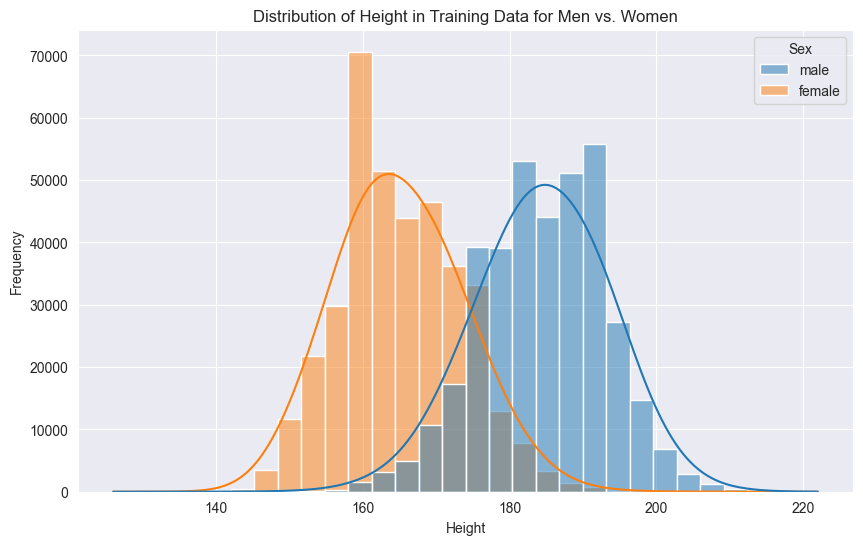

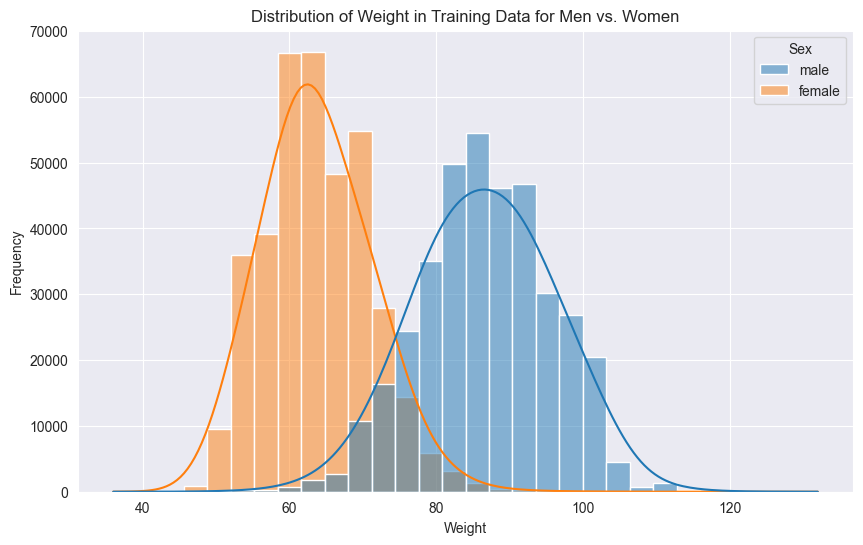

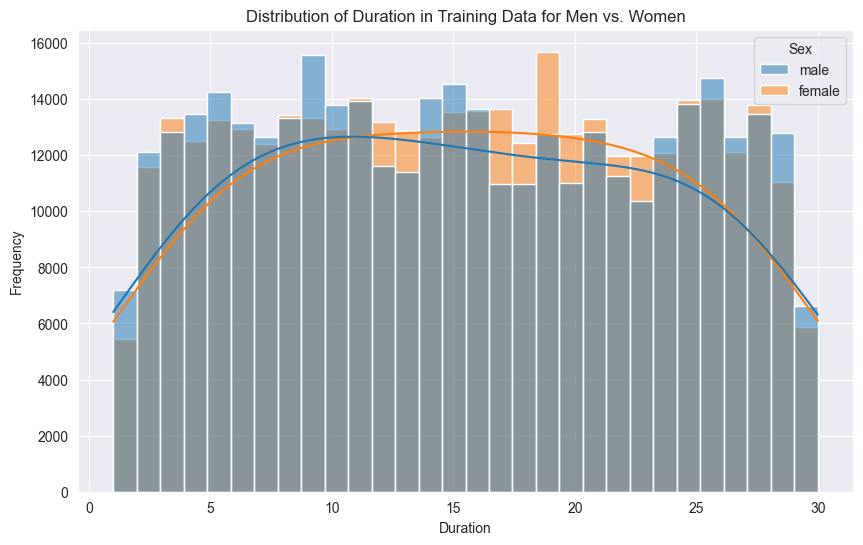

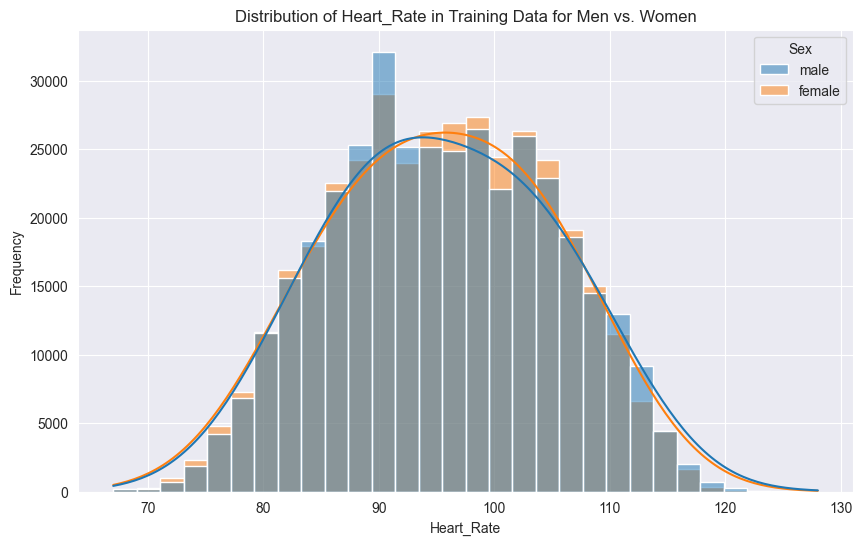

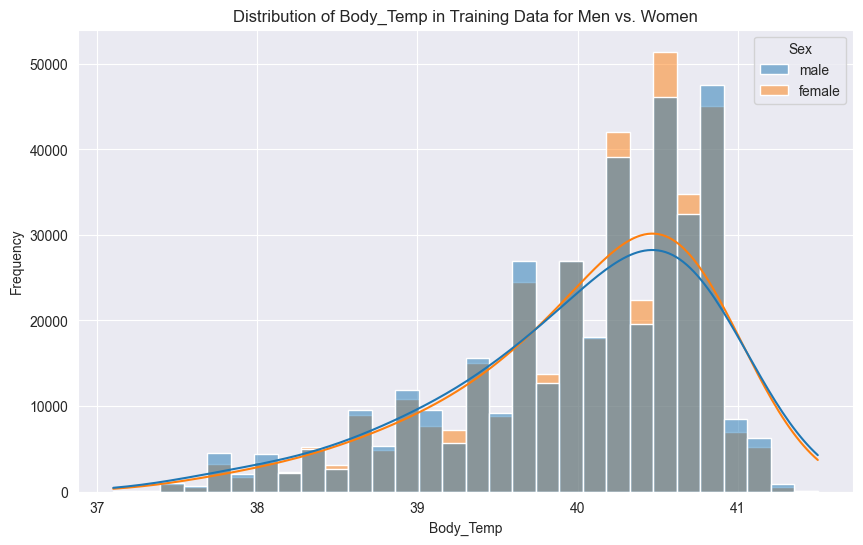

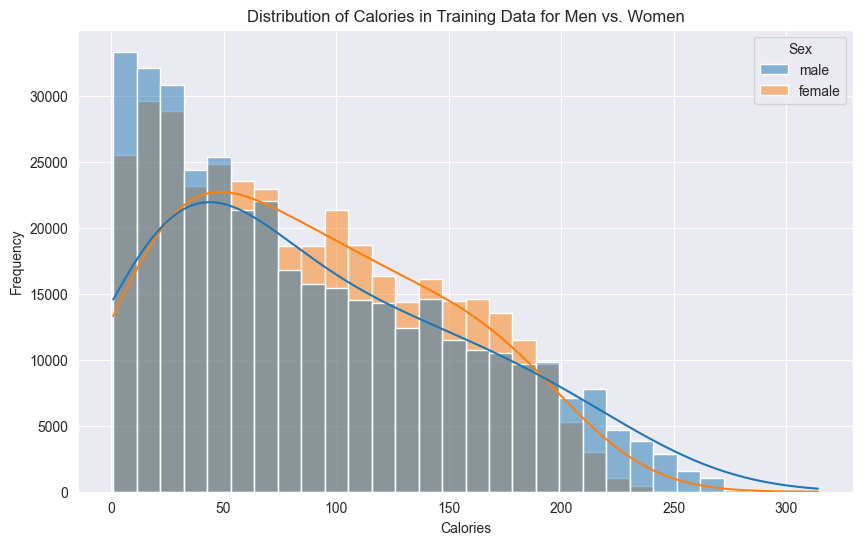

In [68]:
# how do distributions differ between men and women
sex_train = train_data['Sex']
for quantitative_feature in quantitative_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train_data, x=quantitative_feature, bins=30, kde=True, color='mediumseagreen', kde_kws={'bw_method': 0.5}, hue='Sex')
    plt.title(f'Distribution of {quantitative_feature} in Training Data for Men vs. Women')
    plt.xlabel(quantitative_feature)
    plt.ylabel('Frequency')
    
    plt.show()

In [69]:
# compute mean by gender for all quantitative features
train_data.group_by(pl.col('Sex')).agg(pl.all().mean())

Sex,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,train
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""male""",374985.450009,41.567724,184.410448,86.609032,15.340708,95.570366,40.023803,89.033683,1.0
"""female""",375013.496068,41.27365,165.0222,63.7263,15.501013,95.397955,40.048655,87.534761,1.0


In [70]:
# compute median by gender for all quantitative features
train_data.group_by(pl.col('Sex')).agg(pl.all().median())

Sex,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,train
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""male""",375062.0,40.0,184.0,87.0,15.0,95.0,40.2,73.0,1.0
"""female""",374942.0,40.0,164.0,63.0,16.0,96.0,40.3,80.0,1.0


**Observations and Insights**

- strong linear correlation between height and weight (r=.96)
- clear nonlinear relationship between body temperature and calories. Could explore log, sqrt, or exp to improve performance for linear model
- duration, heart rate, and body temperature are all positively correlated with calories burned. This makes logical sense to me
- significant differences mainly in height and weight for men and women (men higher for both) based on both computed stats and kde plots

# Feature Engineering - Body Temperature

To address the clear nonlinear relationship betwee body temperature and the number of calories burned, I will explore transformations to linearize body temp with respect to calories.

In [71]:
sns.set_style("darkgrid")

Text(0.5, 1.0, 'Body Temperature vs Calories with Linear Regression Fit')

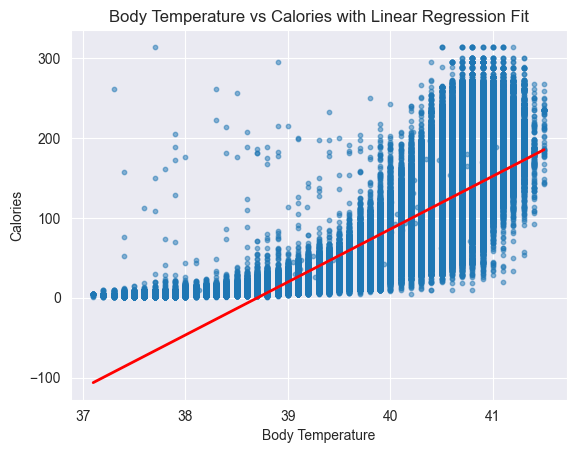

In [72]:
sns.regplot(data=train_data, x='Body_Temp', y='Calories', 
            scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 2}, order=1)

plt.xlabel('Body Temperature')
plt.ylabel('Calories')

plt.title('Body Temperature vs Calories with Linear Regression Fit')

Text(0.5, 1.02, 'Distribution of Body Temperature vs Calories in Training Data')

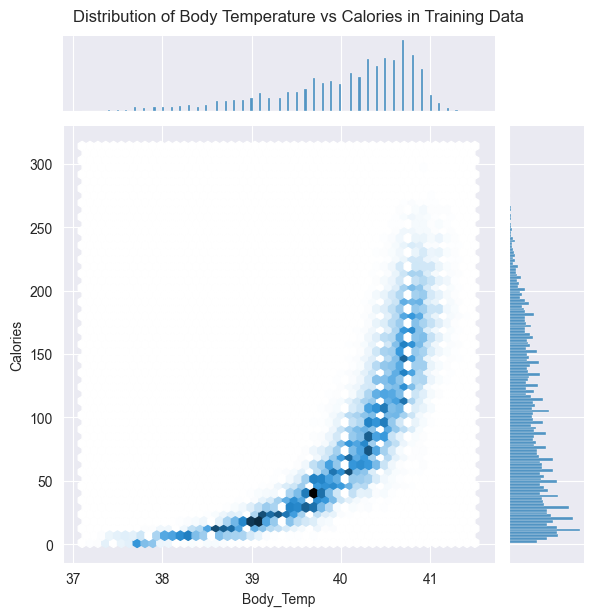

In [73]:
sns.jointplot(data=train_data, x='Body_Temp', y='Calories', kind='hex')
plt.suptitle('Distribution of Body Temperature vs Calories in Training Data', y=1.02)

To me, this looks like an exponential curve, defined by:

$$
\text{Calories} = e^{\text{Body Temp}}
$$

I could just take the log of Calories and make that the new target, but then that screws up the distribution of the other features that were orignally linear w.r.t. Calories. So, I'll instead use exp(Body_Temp) as a new feature.

Text(0.5, 1.02, 'Distribution of exp(Body Temperature) vs Calories in Training Data')

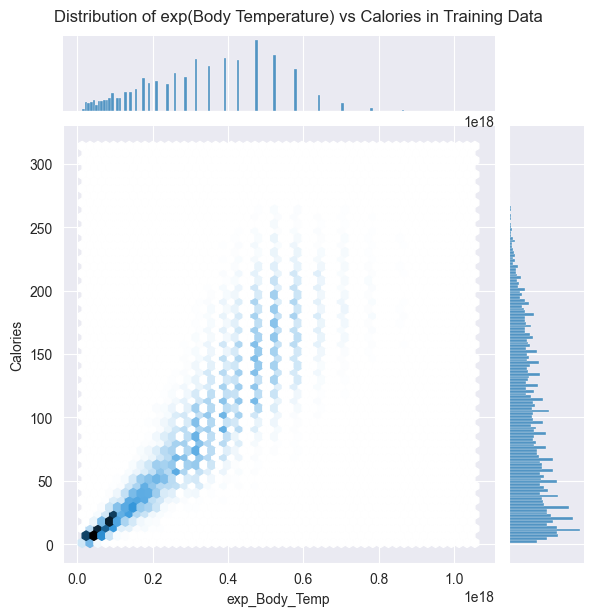

In [74]:
train_data = train_data.with_columns(exp_Body_Temp=pl.col('Body_Temp').exp())

sns.jointplot(data=train_data, x='exp_Body_Temp', y='Calories', kind='hex')
plt.suptitle('Distribution of exp(Body Temperature) vs Calories in Training Data', y=1.02)

Text(0.5, 1.0, 'exp(Body Temperature) vs Calories with Linear Regression Fit')

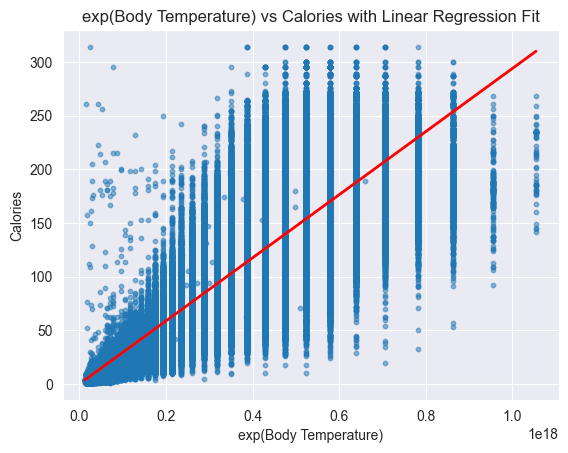

In [75]:
sns.regplot(data=train_data, x='exp_Body_Temp', y='Calories', 
            scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 2}, order=1)

plt.xlabel('exp(Body Temperature)')
plt.ylabel('Calories')

plt.title('exp(Body Temperature) vs Calories with Linear Regression Fit')

In [76]:
# is exp(Body_Temp) a better linear fit based on pearson correlation coefficient
train_data[['Body_Temp', 'exp_Body_Temp', 'Calories']].corr()

Body_Temp,exp_Body_Temp,Calories
f64,f64,f64
1.0,0.923862,0.828671
0.923862,1.0,0.897801
0.828671,0.897801,1.0


^^ Conclusion: yes (r = .898 vs .829)

In [77]:
# adding exp(Body_Temp) to the dataset and removing Body_Temp
all_data = all_data.with_columns(exp_Body_Temp=pl.col('Body_Temp').exp())
all_data = all_data.drop('Body_Temp')

all_data.head()

id,Sex,Age,Height,Weight,Duration,Heart_Rate,Calories,train,exp_Body_Temp
i64,str,i64,f64,f64,f64,f64,f64,bool,f64
0,"""male""",36,189.0,82.0,26.0,101.0,150.0,true,6.3984e17
1,"""female""",64,163.0,60.0,8.0,85.0,34.0,true,1.7438e17
2,"""female""",51,161.0,64.0,7.0,84.0,29.0,true,1.9272e17
3,"""male""",20,192.0,90.0,25.0,105.0,140.0,true,4.7401e17
4,"""female""",38,166.0,61.0,25.0,102.0,146.0,true,4.2890e17


In [78]:
quantitative_features.remove('Body_Temp')
quantitative_features.append('exp_Body_Temp')

Text(0.5, 1.0, 'Correlation Heatmap of Modified Quantitative Features in Training Data')

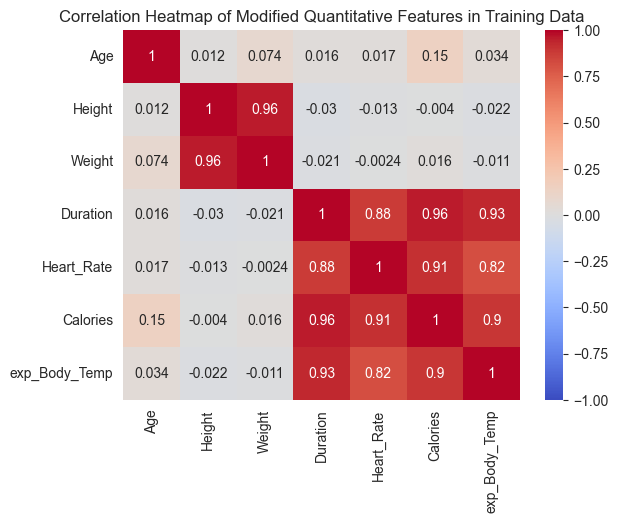

In [79]:
# check out the correlations between features now
# what do the correlations look like now?
sns.heatmap(train_data[quantitative_features].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', xticklabels=quantitative_features, yticklabels=quantitative_features)
plt.title('Correlation Heatmap of Modified Quantitative Features in Training Data')

**Observations and Insights**

- this transformation clearly produces a better linear relationship between the engineered feature and Calories
- one concern is that some of the values for exp(Body_Temp) are extremely high (10^10). This could cause problems with numerical stability when inverting X.T @ X
- high correlation between exp(Body_Temp) and heart rate and duration. This also makes sense to me.

# Feature Engineering - BMI

The height is given in cm and the weight is given in kg, and the formula for BMI is:

$$
\text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2}
$$

... so we'll have to convert a bit to compute BMI. 

In [80]:
# create new height metric in meters
all_data = all_data.with_columns(height_meters = pl.col('Height') / 100)

# compute bmi
all_data = all_data.with_columns(bmi = pl.col('Weight') / (pl.col('height_meters') ** 2))

# drop the height_meters column
all_data = all_data.drop('height_meters')

all_data.head()

id,Sex,Age,Height,Weight,Duration,Heart_Rate,Calories,train,exp_Body_Temp,bmi
i64,str,i64,f64,f64,f64,f64,f64,bool,f64,f64
0,"""male""",36,189.0,82.0,26.0,101.0,150.0,true,6.3984e17,22.955684
1,"""female""",64,163.0,60.0,8.0,85.0,34.0,true,1.7438e17,22.582709
2,"""female""",51,161.0,64.0,7.0,84.0,29.0,true,1.9272e17,24.690405
3,"""male""",20,192.0,90.0,25.0,105.0,140.0,true,4.7401e17,24.414062
4,"""female""",38,166.0,61.0,25.0,102.0,146.0,true,4.2890e17,22.13674


In [81]:
# bmi is one of us now!
quantitative_features = list(set(quantitative_features + ['bmi']))

quantitative_features

['Heart_Rate',
 'bmi',
 'Weight',
 'Height',
 'exp_Body_Temp',
 'Duration',
 'Calories',
 'Age']

In [82]:
all_data['bmi'].describe()

statistic,value
str,f64
"""count""",1e6
"""null_count""",0.0
"""mean""",24.373046
"""std""",1.511426
"""min""",12.375937
"""25%""",23.255019
"""50%""",24.386526
"""75%""",25.484765
"""max""",46.443986


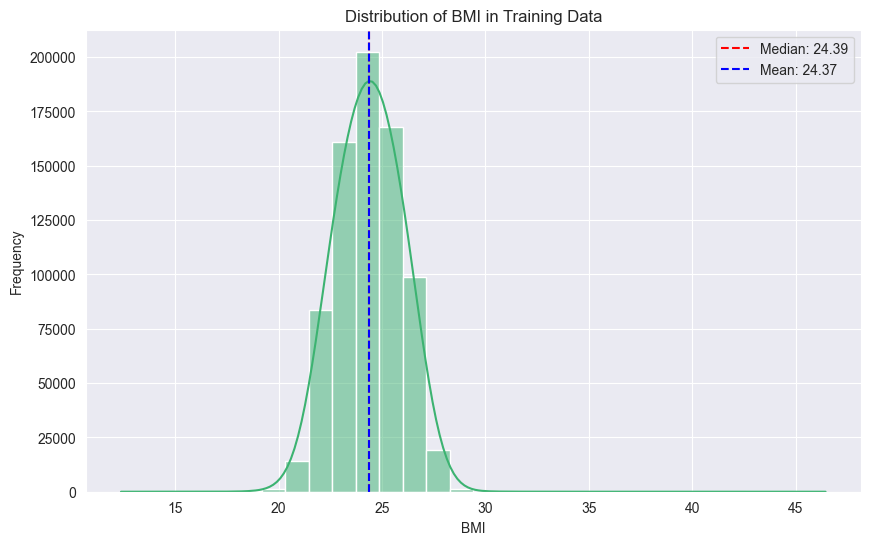

In [83]:
train_data_bmi = all_data.filter(pl.col('train') == True)

# plot the distribution of bmi
plt.figure(figsize=(10, 6))
sns.histplot(train_data_bmi['bmi'], bins=30, kde=True, color='mediumseagreen', kde_kws={'bw_method': 0.5})
plt.title(f'Distribution of BMI in Training Data')
plt.xlabel('BMI')
plt.ylabel('Frequency')

feature_median = train_data_bmi['bmi'].median()
feature_mean = train_data_bmi['bmi'].mean()

plt.axvline(feature_median, color='red', linestyle='--', label=f'Median: {round(feature_median, 2)}')
plt.axvline(feature_mean, color='blue', linestyle='--', label=f'Mean: {round(feature_mean, 2)}')
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

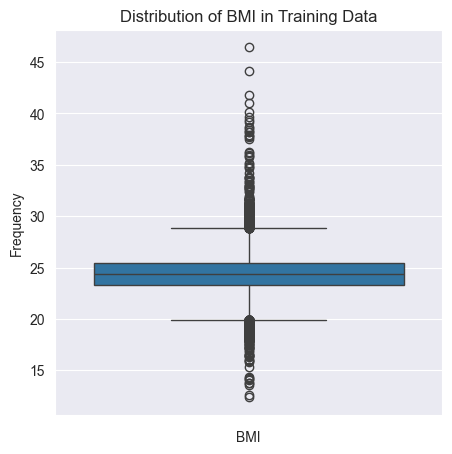

In [84]:
# same thing but a boxplot. Want to see outliers
plt.figure(figsize=(5, 5))
sns.boxplot(train_data_bmi['bmi'])
plt.title(f'Distribution of BMI in Training Data')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Correlation Heatmap of Modified Quantitative Features in Training Data')

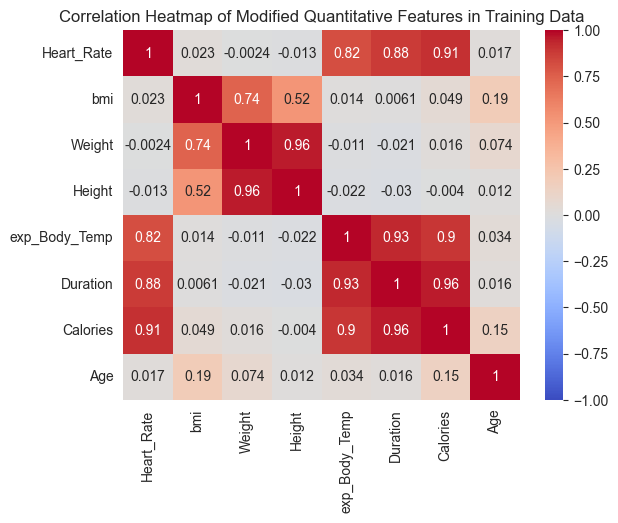

In [85]:
# what do the correlations look like now?
sns.heatmap(train_data_bmi[quantitative_features].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', xticklabels=quantitative_features, yticklabels=quantitative_features)
plt.title('Correlation Heatmap of Modified Quantitative Features in Training Data')

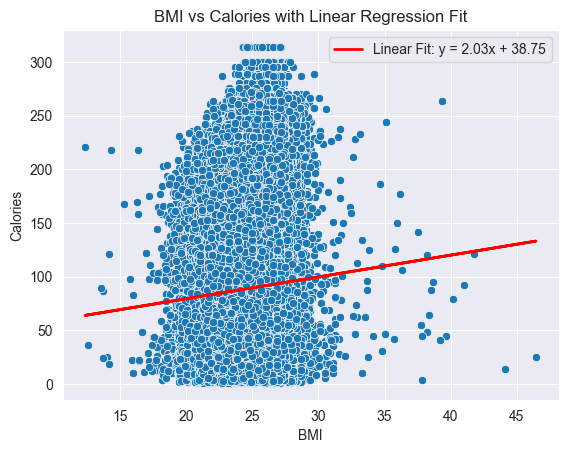

In [86]:
sns.scatterplot(data=train_data_bmi, x='bmi', y='Calories')

train_bmi = train_data_bmi['bmi'].to_numpy()
train_calories = train_data_bmi['Calories'].to_numpy()

# linear fit
slope, intercept = np.polyfit(train_bmi, train_calories, 1)

plt.plot(train_bmi, slope * train_bmi + intercept, color='red', lw=2, label=f'Linear Fit: y = {round(slope, 2)}x + {round(intercept, 2)}')
plt.xlabel('BMI')
plt.ylabel('Calories')
plt.title('BMI vs Calories with Linear Regression Fit')
plt.legend()
plt.show()

**Observations and Insights**

- not much of a linear correlation between BMI and the number of calories burned. Will keep it in for now but likely exclude from the final model
- this is interesting and not what I would have expected. I would think that higher BMI would make a person burn more calories. It's also interesting that BMI has little correlation with duration or heart rate - I would expect them to be lower and higher respectively

# Fit an initial linear model for analysis purposes. No Train/Test split or CV for now

To get a better understanding of the relationship between the features and Calories, I'll attempt to fit an initial linear regression model

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_log_error

In [88]:
# convert string categorical column 'Sex' to 2 binary one-hot encoded columns
all_data = all_data.to_dummies('Sex')

In [89]:
X = all_data.filter(pl.col('train') == True).select(pl.exclude(['Calories', 'id', 'train', 'exp_Body_Temp']))
y = all_data.filter(pl.col('train') == True).select(pl.col('Calories'))

In [90]:
model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X).clip(0, None) # so we don't get negative values and break the log

root_mean_squared_log_error(y.to_numpy(), y_pred)

0.6447743319740328

In [91]:
# what about R^2?
model.score(X, y)

0.9599661554514455

In [92]:
coefficients = {feature_name : coefficient for feature_name, coefficient in zip(model.feature_names_in_, model.coef_[0])}

coefficients

{'Sex_female': np.float64(0.1672115037511999),
 'Sex_male': np.float64(-0.16721150375114197),
 'Age': np.float64(0.5255566456111208),
 'Height': np.float64(-2.1450267961433784),
 'Weight': np.float64(2.6069431274458754),
 'Duration': np.float64(5.254821261230828),
 'Heart_Rate': np.float64(1.9192759302422788),
 'bmi': np.float64(-7.695606955943365)}

<BarContainer object of 8 artists>

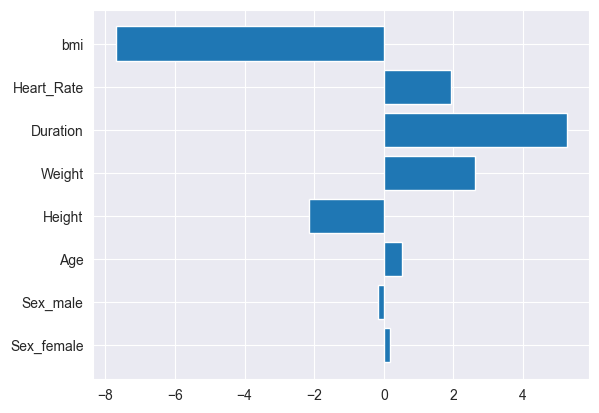

In [93]:
plt.barh(coefficients.keys(), coefficients.values())

# Is exp(Body_Temp) Causing Numerical Instability when inverting X.T @ X for linear regression?

The way you would determine this is by analyzing the matrix condition number, which is just the highest eigenvalue divided by the lowest eigenvalue.

I didn't show this before but when fitting linear regression with exp(Body_Temp) incuded, all of the coefficients were extremely low and model r^2 sucked. So I dropped exp(Body_Temp) and proceeded

In [94]:
# analyzing matrix stability. Was having problems fitting the linear model when exp_Body_Temp was included
# and suspected it was because of extreme values in exp_Body_Temp. So checking here
X_with_exp_BT = all_data.filter(pl.col('train') == True).select(pl.exclude(['Calories', 'id', 'train'])).to_numpy()
X_without_exp_BT = all_data.filter(pl.col('train') == True).select(pl.exclude(['Calories', 'id', 'train', 'exp_Body_Temp'])).to_numpy()

# generally log base 10 of the condition number is the number of digits of precision lost when doing matrix inversion
np.linalg.cond(X_with_exp_BT), np.linalg.cond(X_without_exp_BT)

(np.float64(1.841869651953092e+34), np.float64(55556.45951351673))

So yes, my hypothesis was correct. exp_Body_Weight is causing problems due to extremely high values. Will need to correct somehow.

Typically this kind of thing is caused by a lot of multicollinearity but in this case we know that's not what's causing it since several of the features besides exp_Body_Temp are correlated.

# Scaling exp_Body_Temp to fix numerical instability problems

To fix this problem, I'll do a min-max scale of exp(Body_Temp), which essentially just maps it to the range [0, 1]

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
# min-max scale exp_Body_Temp
exp_Body_Temp_train = all_data.filter(pl.col('train') == True).select(pl.col('exp_Body_Temp')).to_numpy()
exp_Body_Temp_test = all_data.filter(pl.col('train') == False).select(pl.col('exp_Body_Temp')).to_numpy()

scaler = MinMaxScaler()

# obtain the max and min based on the training set to avoid data leakage
scaled_exp_Body_Temp_train = scaler.fit_transform(exp_Body_Temp_train)
scaled_exp_Body_Temp_test = scaler.transform(exp_Body_Temp_test)

# we expect the scaled values to be between 0 and 1
scaled_exp_Body_Temp_train.min(), scaled_exp_Body_Temp_train.max(), scaled_exp_Body_Temp_test.min(), scaled_exp_Body_Temp_test.max()

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

In [97]:
scaled_exp_Body_Temp = np.concat([scaled_exp_Body_Temp_train, scaled_exp_Body_Temp_test], axis = 0).flatten()

all_data = all_data.with_columns(scaled_exp_Body_Temp=scaled_exp_Body_Temp)

all_data

id,Sex_female,Sex_male,Age,Height,Weight,Duration,Heart_Rate,Calories,train,exp_Body_Temp,bmi,scaled_exp_Body_Temp
i64,u8,u8,i64,f64,f64,f64,f64,f64,bool,f64,f64,f64
0,0,1,36,189.0,82.0,26.0,101.0,150.0,true,6.3984e17,22.955684,0.60164
1,1,0,64,163.0,60.0,8.0,85.0,34.0,true,1.7438e17,22.582709,0.154924
2,1,0,51,161.0,64.0,7.0,84.0,29.0,true,1.9272e17,24.690405,0.172524
3,0,1,20,192.0,90.0,25.0,105.0,140.0,true,4.7401e17,24.414062,0.442484
4,1,0,38,166.0,61.0,25.0,102.0,146.0,true,4.2890e17,22.13674,0.399193
…,…,…,…,…,…,…,…,…,…,…,…,…
999995,1,0,56,159.0,62.0,6.0,85.0,null,false,1.2918e17,24.524346,0.111549
999996,0,1,32,202.0,101.0,3.0,84.0,null,false,4.7523e16,24.752475,0.033179
999997,1,0,31,164.0,64.0,14.0,98.0,null,false,2.6014e17,23.79536,0.237232


In [98]:
# now see what the effect of exp_Body_Temp on matrix stability is 
X_with_scaled_exp_BT = all_data.filter(pl.col('train') == True).select(pl.exclude(['Calories', 'id', 'train', 'exp_Body_Temp'])).to_numpy()
X_without_scaled_exp_BT = all_data.filter(pl.col('train') == True).select(pl.exclude(['Calories', 'id', 'train', 'exp_Body_Temp', 'scaled_exp_Body_Temp'])).to_numpy()

np.linalg.cond(X_with_scaled_exp_BT), np.linalg.cond(X_without_scaled_exp_BT)

(np.float64(55569.27008422108), np.float64(55556.45951351673))

Conclusion: 'exp_Body_Temp' won't break matrix inversion!

In [99]:
# drop the unscaled exp_Body_Temp column
all_data = all_data.drop('exp_Body_Temp')

In [100]:
X = all_data.filter(pl.col('train') == True).select(pl.exclude(['Calories', 'id', 'train']))
y = all_data.filter(pl.col('train') == True).select(pl.col('Calories'))

In [101]:
model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X).clip(0, None) # so we don't get negative values and break the log

root_mean_squared_log_error(y.to_numpy(), y_pred)

0.644751397204762

In [102]:
# what about R^2?
model.score(X, y)

0.9599663948007923

In [103]:
# what do the coefficients look like now?
coefficients = {feature_name : coefficient for feature_name, coefficient in zip(model.feature_names_in_, model.coef_[0])}

coefficients

{'Sex_female': np.float64(0.16767080871634046),
 'Sex_male': np.float64(-0.16767080871628504),
 'Age': np.float64(0.5256554668274868),
 'Height': np.float64(-2.145864264200764),
 'Weight': np.float64(2.6079767257351008),
 'Duration': np.float64(5.263971173986482),
 'Heart_Rate': np.float64(1.9194595518734985),
 'bmi': np.float64(-7.698507153836215),
 'scaled_exp_Body_Temp': np.float64(-0.49471787687881885)}

<BarContainer object of 9 artists>

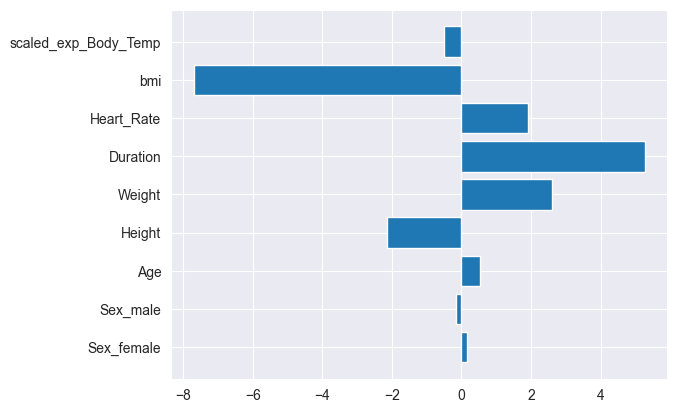

In [106]:
# plot the coefficients
plt.barh(coefficients.keys(), coefficients.values())

Text(0.5, 1.02, 'Distribution of scaled exp(Body Temperature) vs Calories in Training Data')

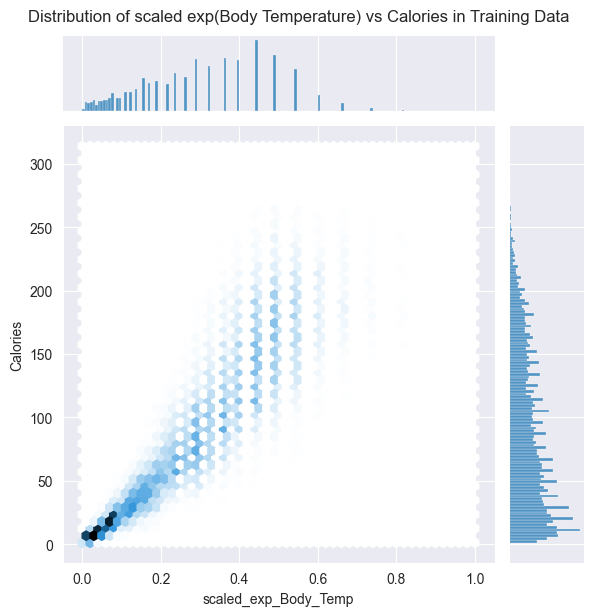

In [105]:
# what's the new relationship? really should be identical since all we did was scale exp_Body_Temp, but just making sure
train_data = all_data.filter(pl.col('train') == True)

sns.jointplot(data=train_data, x='scaled_exp_Body_Temp', y='Calories', kind='hex')
plt.suptitle('Distribution of scaled exp(Body Temperature) vs Calories in Training Data', y=1.02)

# Summary

**Data Quality**
There were no missing or extreme values, so overall not much to say here. Everything looks good to me.

**Univariate and Bivariate Analysis**

Also not much to say here. Some interesting distributions and expected and unexpected feature / target correlations.

**Feature engineering**
1. BMI - this didn't correlate with Calories and only introduces further multicolinearity to the model, so I'll probably exlude it from the final model
2. exp(Body_Temp) - this caused some computational problems although it was highly correlated. May just need to not use linear regression

**Implications for Modeling**

I don't think linear regression is really a good approach here given the problems with constructing and interpreting exp(Body_Temp). Instead, a model that captures nonlinear relationships would be ideal.